# BUSS6002 Assignment 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse 
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore") 

In [3]:
# Read the data file
df = pd.read_csv('SolarSurvey.csv')

### 1. Data Understanding and dimension

In [5]:
#check all numerical data values
df.info()
df.describe().T.round(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Household_ID    3000 non-null   object 
 1   City            3000 non-null   object 
 2   Latitude        2930 non-null   float64
 3   House_Type      2818 non-null   object 
 4   Roof_Type       2661 non-null   object 
 5   Roof_Pitch      2972 non-null   float64
 6   Roof_Azimuth    2916 non-null   float64
 7   Floors          2731 non-null   object 
 8   Financed        3000 non-null   object 
 9   Year            3000 non-null   int64  
 10  Panel_Capacity  3000 non-null   int64  
 11  Shading         2904 non-null   object 
 12  Generation      3000 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 304.8+ KB


,count,mean,std,min,25%,50%,75%,max
Latitude,2930.0,-33.1,4.4,-38.7,-37.8,-33.8,-27.6,-26.5
Roof_Pitch,2972.0,23.6,7.5,5.0,20.0,25.0,30.0,35.0
Roof_Azimuth,2916.0,180.6,122.1,0.0,66.0,177.0,301.0,360.0
Year,3000.0,2015.6,3.9,2001.0,2012.0,2016.0,2019.0,2022.0
Panel_Capacity,3000.0,6424.3,1003.3,2940.0,5880.0,6300.0,7140.0,9660.0
Generation,3000.0,8969.8,14140.1,-249813.1,8125.6,9901.3,11642.9,18868.1


In [6]:
#get categorical data columns
hID='Household_ID'
categorical_columns = ['City','House_Type','Roof_Type','Floors','Financed','Shading']

In [7]:
#check categorical data values
print('\n*'+hID+'*') 
house=df[hID].value_counts().sort_values(ascending=False)
print('Max Frequency:\n'+str(house.head(2))+'\nMin Frequency:\n'+str(house.tail(2)))
for i in categorical_columns:
    print('\n*'+str(i)+'*') 
    print(df[i].value_counts().sort_values(ascending=False))
    


*Household_ID*
Max Frequency:
A553C5784D    1
4D66141F81    1
Name: Household_ID, dtype: int64
Min Frequency:
BAC8883CA0    1
396D8F6DD2    1
Name: Household_ID, dtype: int64

*City*
Brisbane     1000
Sydney       1000
Melbourne    1000
Name: City, dtype: int64

*House_Type*
Timber Frame    1988
Double Brick     559
Other            258
Weatherboard      13
Name: House_Type, dtype: int64

*Roof_Type*
Tile         1358
Steel        1010
Other         259
Colorbond      34
Name: Roof_Type, dtype: int64

*Floors*
Single    1180
Double    1118
Other      433
Name: Floors, dtype: int64

*Financed*
Yes    2049
No      951
Name: Financed, dtype: int64

*Shading*
None           2215
Partial         561
Significant     128
Name: Shading, dtype: int64


### 2. Candidate models
### feature engineering

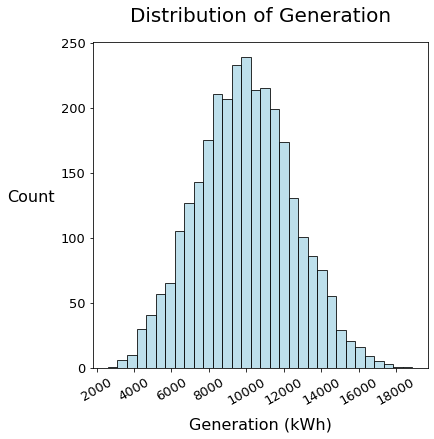

In [9]:
#histgram of Generation 
g= df['Generation']
plt.figure(figsize=(6,6))
plt.hist(g[g>=0],bins=32,alpha=0.8, color='lightblue',edgecolor='black',linewidth=1)
plt.xticks(size=13,rotation=30)
plt.yticks(size=13)
plt.xlabel('Generation (kWh)',labelpad=10,fontsize=16)
plt.ylabel('Count',labelpad=30 ,fontsize=16 ,rotation=0)
plt.title('Distribution of Generation',fontsize=20,pad=20)
plt.show()

In [10]:
#adjust 
df1=df[df['Generation']>=0].copy()

### Predictors

In [12]:
# household_ID
df1=df1.drop(columns=['Household_ID'])
df1

,City,Latitude,House_Type,Roof_Type,Roof_Pitch,Roof_Azimuth,Floors,Financed,Year,Panel_Capacity,Shading,Generation
0,Brisbane,NaN,NaN,Steel,10.0,21.0,Double,No,2019,5040,None,10163.796
1,Brisbane,-27.217398,Timber Frame,Tile,35.0,50.0,Single,Yes,2011,5880,NaN,10876.910
2,Brisbane,-27.252449,Double Brick,NaN,20.0,272.0,Single,Yes,2018,5040,NaN,9400.415
3,Brisbane,-27.042364,Timber Frame,Steel,35.0,247.0,NaN,Yes,2012,5040,None,7747.349
4,Brisbane,-27.432734,Other,Steel,10.0,39.0,Double,Yes,2012,5880,None,10987.674
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Melbourne,-37.741982,Other,Tile,30.0,132.0,Single,Yes,2011,7560,Significant,4252.178
2996,Melbourne,-38.008012,Other,Tile,10.0,57.0,Double,Yes,2020,7140,Significant,5684.912
2997,Melbourne,-38.342210,Timber Frame,Tile,22.5,352.0,Single,Yes,2017,7140,None,12026.470
2998,Melbourne,-37.579522,Timber Frame,Tile,5.0,115.0,Single,No,2014,6300,None,8902.884


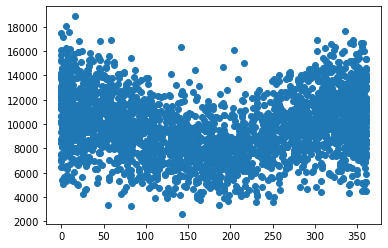

In [13]:
# histogram of Roof_Azimuth
plt.scatter(df1['Roof_Azimuth'],df1['Generation'])
plt.show()

In [14]:
df1['squared_Roof_Azimuth']= df1['Roof_Azimuth']**2

rfa=df1['Roof_Azimuth']
rfa[rfa>180]= 360 -rfa[rfa>180]

In [15]:
#check data type
print(df1.dtypes)
num=['Latitude','Roof_Pitch','Roof_Azimuth','Year','Panel_Capacity','squared_Roof_Azimuth']
caterg=['City','House_Type', 'Roof_Type','Floors','Financed','Shading']

City                     object
Latitude                float64
House_Type               object
Roof_Type                object
Roof_Pitch              float64
Roof_Azimuth            float64
Floors                   object
Financed                 object
Year                      int64
Panel_Capacity            int64
Shading                  object
Generation              float64
squared_Roof_Azimuth    float64
dtype: object


In [16]:
#num var
df1[num+['Generation']].corr()['Generation'].abs().sort_values(ascending=False)

Generation              1.000000
Panel_Capacity          0.601328
Roof_Azimuth            0.439309
Latitude                0.350257
Year                    0.153241
squared_Roof_Azimuth    0.100417
Roof_Pitch              0.037910
Name: Generation, dtype: float64

In [17]:
# categorical var
df=pd.get_dummies(df1[caterg+['Generation']])
df.corr()['Generation'].abs()

Generation                 1.000000
City_Brisbane              0.329084
City_Melbourne             0.278129
City_Sydney                0.050803
House_Type_Double Brick    0.023717
House_Type_Other           0.010157
House_Type_Timber Frame    0.002787
House_Type_Weatherboard    0.015938
Roof_Type_Colorbond        0.021025
Roof_Type_Other            0.013523
Roof_Type_Steel            0.006274
Roof_Type_Tile             0.007597
Floors_Double              0.042203
Floors_Other               0.024784
Floors_Single              0.005757
Financed_No                0.004225
Financed_Yes               0.004225
Shading_None               0.415326
Shading_Partial            0.281456
Shading_Significant        0.384662
Name: Generation, dtype: float64

In [18]:
# 
df=pd.get_dummies(df1[['Panel_Capacity','Latitude','Roof_Azimuth','City','Shading','squared_Roof_Azimuth','Generation']],drop_first=True)
df.corr()

,Panel_Capacity,Latitude,Roof_Azimuth,squared_Roof_Azimuth,Generation,City_Melbourne,City_Sydney,Shading_Partial,Shading_Significant
Panel_Capacity,1.000000,-0.023919,-0.009865,-0.009237,0.601328,0.006154,0.009514,-0.007907,0.016036
Latitude,-0.023919,1.000000,-0.033928,-0.001537,0.350257,-0.797442,-0.116128,0.012687,-0.001225
Roof_Azimuth,-0.009865,-0.033928,1.000000,-0.258511,-0.439309,0.034064,-0.006387,0.016028,0.018603
squared_Roof_Azimuth,-0.009237,-0.001537,-0.258511,1.000000,0.100417,-0.012160,0.023188,-0.000268,-0.011325
Generation,0.601328,0.350257,-0.439309,0.100417,1.000000,-0.278129,-0.050803,-0.281456,-0.384662
City_Melbourne,0.006154,-0.797442,0.034064,-0.012160,-0.278129,1.000000,-0.500377,-0.011898,-0.001323
City_Sydney,0.009514,-0.116128,-0.006387,0.023188,-0.050803,-0.500377,1.000000,-0.002434,0.002347
Shading_Partial,-0.007907,0.012687,0.016028,-0.000268,-0.281456,-0.011898,-0.002434,1.000000,-0.100854
Shading_Significant,0.016036,-0.001225,0.018603,-0.011325,-0.384662,-0.001323,0.002347,-0.100854,1.000000


In [19]:
# 
Bne=df1[df1['City']=='Brisbane']
Mel=df1[df1['City']=='Melbourne']
Syd=df1[df1['City']=='Sydney']

print(Bne['Latitude'].min(), Bne['Latitude'].max())
print(Mel['Latitude'].min(), Mel['Latitude'].max())
print(Syd['Latitude'].min(), Syd['Latitude'].max())

-28.277746 -26.509521
-38.749188 -37.072212
-34.643066 -33.026605


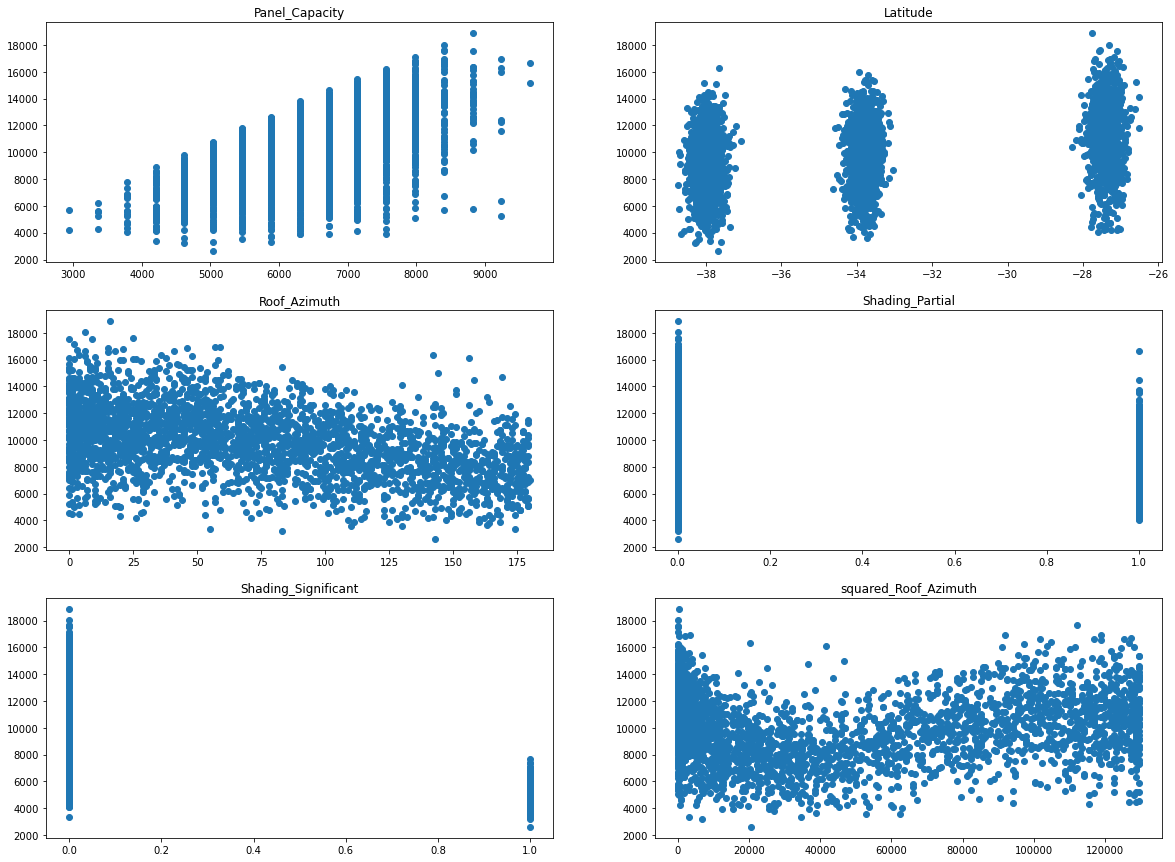

In [20]:
variables=['Panel_Capacity','Latitude','Roof_Azimuth','Shading_Partial','Shading_Significant','squared_Roof_Azimuth']

plt.figure(figsize=(20,15))
for i in range(len(variables)):
    ax=plt.subplot(3,2, i+1)
    plt.scatter(df[variables[i]],df['Generation'])
    plt.title(variables[i])
plt.show()

### Missing value

In [22]:
df[variables].isnull().sum()

Panel_Capacity           0
Latitude                69
Roof_Azimuth            84
Shading_Partial          0
Shading_Significant      0
squared_Roof_Azimuth    84
dtype: int64

In [23]:
miss_index_Bne= df1[(df1['Latitude'].isnull()) & (df1['City'] =='Brisbane')].index
miss_index_Mel= df1[(df1['Latitude'].isnull()) & (df1['City'] =='Melbourne')].index
miss_index_Syd= df1[(df1['Latitude'].isnull()) & (df1['City'] =='Sydney')].index

df.loc[miss_index_Bne , 'Latitude' ]= df1[df1['City'] =='Brisbane']['Latitude'].mean()
df.loc[miss_index_Mel , 'Latitude' ]= df1[df1['City'] =='Melbourne']['Latitude'].mean()
df.loc[miss_index_Syd , 'Latitude' ]= df1[df1['City'] =='Sydney']['Latitude'].mean()

In [24]:
df = df.dropna(subset = variables)

### M1

### M2

### M3

### Estimate

In [29]:
# train-vali-test split
X=df[['Panel_Capacity','Latitude','Roof_Azimuth','Shading_Partial','Shading_Significant','squared_Roof_Azimuth']]
y=df['Generation']

X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1)

print('Test:', X_test.shape)
print('Train and vali:', X_tv.shape)

X_train, X_vali, y_train, y_vali = train_test_split(X_tv, y_tv, test_size = 1/3,random_state = 1)

print('Training:', X_train.shape)
print('Validation:', X_vali.shape)

Test: (726, 6)
Train and vali: (2175, 6)
Training: (1450, 6)
Validation: (725, 6)


In [30]:
# estimate candidate models M1
lrg1=LinearRegression()
lrg1.fit(X_train.iloc[:,:3],y_train)

pred_train1 = lrg1.predict(X_train.iloc[:,:3])

In [31]:
# estimate candidate models M2
lrg2 = LinearRegression()
lrg2.fit(X_train.iloc[:,:-1],y_train)

pred_train2 = lrg2.predict(X_train.iloc[:,:-1])

In [32]:
# estimate candidate models M3
lrg3=LinearRegression()
lrg3.fit(X_train,y_train)

pred_train3 = lrg3.predict(X_train)

### Q2 result

In [34]:
# M1
print('beta 0: {:.4f}'.format(lrg1.intercept_))
for i in range(3):
    print('beta {}: {:.4f}'.format(i+1,lrg1.coef_[i]))
mse_train1 = mse( y_train,pred_train1)
print("M1 Train mse: {:.4f}".format(mse_train1))

beta 0: 8370.8484
beta 1: 1.5247
beta 2: 205.1198
beta 3: -20.8006
M1 Train mse: 2194053.5213


In [35]:
# M2
print('beta 0: {:.4f}'.format(lrg2.intercept_))
for i in range(5):
    print('beta {}: {:.4f}'.format(i+1,lrg2.coef_[i]))
mse_train2 = mse( y_train,pred_train2)
print("M2 Train mse: {:.4f}".format(mse_train2))

beta 0: 8855.0029
beta 1: 1.5357
beta 2: 205.7549
beta 3: -19.5757
beta 4: -2057.0545
beta 5: -5232.7601
M2 Train mse: 573263.4851


In [36]:
# M3
print('beta 0: {:.4f}'.format(lrg3.intercept_))
for i in range(6):
    print('beta {}: {:.4f}'.format(i+1,lrg3.coef_[i]))
mse_train3 = mse( y_train,pred_train3)
print("M3 Train mse: {:.4f}".format(mse_train3))

beta 0: 8857.3897
beta 1: 1.5358
beta 2: 205.7398
beta 3: -19.5870
beta 4: -2056.8289
beta 5: -5232.7741
beta 6: -0.0001
M3 Train mse: 573257.4731


### Q3 based on residual

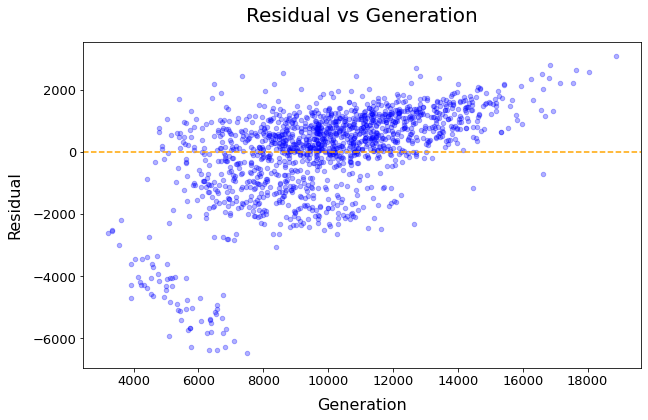

Mean of residual: -0.0000


In [38]:

res1 = y_train - pred_train1
plt.figure(figsize=(10,6))

plt.scatter(y_train, res1 ,marker='o',s=20,c='blue',alpha=0.3)
plt.axhline(y=0 ,linestyle='--',c='orange')
plt.xticks(size=13)
plt.yticks(size=13)
plt.xlabel('Generation',labelpad=10,fontsize=16)
plt.ylabel('Residual',labelpad=10,fontsize=16)
plt.title('Residual vs Generation',fontsize=20,pad=20)
plt.show()

print('Mean of residual: {:.4f}'.format(res1.mean()))

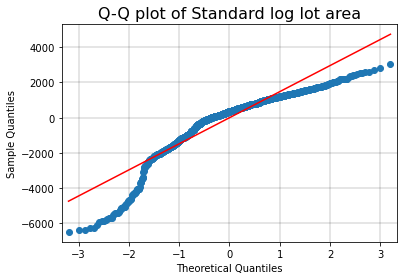

Skewness: -1.6377
Skewness: 3.4931


In [39]:
# refer to
probplot =sm.ProbPlot(res1)
probplot.qqplot(line='s')

plt.grid(linestyle ='-',linewidth=0.2, color ='black')
plt.title('Q-Q plot of Standard log lot area',fontsize=16)

plt.show()

print('Skewness: {:.4f}'.format(res1.skew()))
print('Skewness: {:.4f}'.format(res1.kurt()))

### step predict the observation in validation set 

In [41]:
pred_vali1=lrg1.predict(X_vali.iloc[:,:3])
mse_vali1= mse(y_vali,pred_vali1)
print('M1 Vali mse : {:.4f}'.format(mse_vali1))

pred_vali2=lrg2.predict(X_vali.iloc[:,:-1])
mse_vali2= mse(y_vali,pred_vali2)
print('M2 Vali mse : {:.4f}'.format(mse_vali2))

pred_vali3=lrg3.predict(X_vali)
mse_vali3= mse(y_vali,pred_vali3)
print('M2 Vali mse : {:.4f}'.format(mse_vali3))

M1 Vali mse : 2055056.9071
M2 Vali mse : 458442.5487
M2 Vali mse : 458508.0144


### q4

### q5 Select the best lowest mse

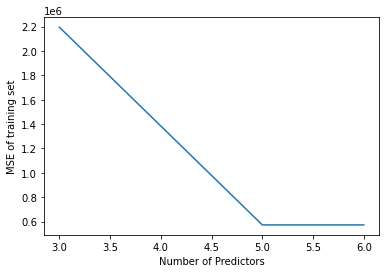

In [44]:
plt.plot([3,5,6],[mse_train1,mse_train2,mse_train3])
plt.xlabel('Number of Predictors')
plt.ylabel('MSE of training set')
plt.show()

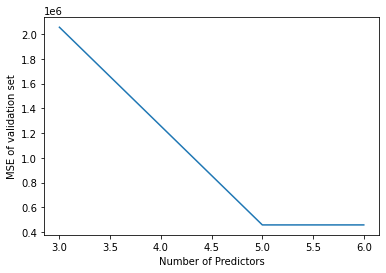

In [45]:
plt.plot([3,5,6],[mse_vali1,mse_vali2,mse_vali3])
plt.xlabel('Number of Predictors')
plt.ylabel('MSE of validation set')
plt.show()

### 4. Model evaluation

In [47]:
lrg = LinearRegression()
lrg.fit(X_tv.iloc[:,:-1], y_tv)


LinearRegression()

In [48]:
pred =lrg.predict(X_test.iloc[:,:-1])


In [49]:
mse_test= mse(y_test, pred)
print('M2 test mse : {:.4f}'.format(mse_test))

M2 test mse : 466720.9878


#### 4.1 Benchmark Model 1

In [51]:
y_tv_b1= y_tv[df1.loc[y_tv.index]['Year']>= 2019]

df_b1=df1.loc[y_tv_b1.index][['Generation','City']]

bm1result= df_b1.groupby(['City']).mean()

print(bm1result)


             Generation
City                   
Brisbane   11528.507959
Melbourne   9310.588362
Sydney     10206.044827


#### 4.2 Benchmark Model 2

In [53]:
y_tv_b2= y_tv[df1.loc[y_tv.index]['Year']>= 2019]

df_b2=df1.loc[y_tv_b2.index][['Generation','City','Panel_Capacity']]

bm2result= df_b2.groupby(['City','Panel_Capacity']).mean()

print(bm2result)


                            Generation
City      Panel_Capacity              
Brisbane  2940             4204.653000
          3360             5587.609000
          3780             6705.066000
          4200             6693.648000
          4620             8464.563000
          5040             8703.594938
          5460             9917.257103
          5880            10585.189179
          6300            10794.757911
          6720            12751.196727
          7140            13272.098371
          7560            13981.429611
          7980            15340.854182
          8400            17831.396500
          8820            16240.516333
          9660            16639.202000
Melbourne 3780             5611.697000
          4200             6009.203714
          4620             6590.920000
          5040             7549.932714
          5460             8266.263667
          5880             8025.145257
          6300             8956.993150
          6720           

In [54]:

# === End of Assignment ===